## Australian House Price 2019-2020 Prediction -- Data Exploration

### 1. Dataset Import
-Download the data from Kaggle to local device. \
-Import the data into the Pandas DataFrame.\

References: 
1. Kaggle API https://www.kaggle.com/docs/api
2. Dataset Source: https://www.kaggle.com/anthonypino/melbourne-housing-market

In [1]:
# !pip install kaggle
# !pip install opendatasets
# !pip install wordcloud
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

In [2]:
import requests
import pandas as pd
#import kaggle
import opendatasets as od
import glob
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import datetime as datetime

In [3]:
# Property market in Australia with less features
#url ="https://www.kaggle.com/htagholdings/aus-real-estate-sales-march-2019-to-april-2020"

# Property market in Melbourne with more features and details
url = 'https://www.kaggle.com/anthonypino/melbourne-housing-market'

od.download(url)

#{"username":"jessesong005","key":"90fe7f55af53ae83de87baed36a9cae5"}

Skipping, found downloaded files in ".\melbourne-housing-market" (use force=True to force download)


In [4]:
path = r'D:\AdvDataCapstone\MyWorkSpace\melbourne-housing-market' 
all_files = glob.glob(path + "/*.csv")

# Concatenate two tables downloaded
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
frame.head(2)
frame[40000:400010]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
40000,Mount Waverley,7 Prospect St,5,h,NaN,SP,Buxton,20/05/2017,3149.0,Eastern Metropolitan,...,14.2,Monash City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40001,Mount Waverley,5 Wadham Pde,5,h,NaN,PI,Barry,20/05/2017,3149.0,Eastern Metropolitan,...,14.2,Monash City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40002,Mount Waverley,276 Waverley Rd,3,h,NaN,PI,Noel,20/05/2017,3149.0,Eastern Metropolitan,...,14.2,Monash City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40003,Mount Waverley,38 Winbourne Rd,4,h,2000000.0,S,Jellis,20/05/2017,3149.0,Eastern Metropolitan,...,14.2,Monash City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40004,Mount Waverley,27 Windsor Av,3,h,NaN,SN,Barry,20/05/2017,3149.0,Eastern Metropolitan,...,14.2,Monash City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97875,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,3013.0,Western Metropolitan,...,6.3,Maribyrnong City Council,4.0,1.0,3.0,593.0,NaN,NaN,-37.81053,144.88467
97876,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,3013.0,Western Metropolitan,...,6.3,Maribyrnong City Council,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826
97877,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,3013.0,Western Metropolitan,...,6.3,Maribyrnong City Council,2.0,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.87856
97878,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,3013.0,Western Metropolitan,...,6.3,Maribyrnong City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(frame.count())
print('length:', len(frame))
print('columns:',len(frame.columns))

Suburb           97880
Address          97880
Rooms            97880
Type             97880
Price            75680
Method           97880
SellerG          97880
Date             97880
Postcode         97879
Regionname       97877
Propertycount    97877
Distance         97879
CouncilArea      97877
Bedroom2         26640
Bathroom         26631
Car              26129
Landsize         23047
BuildingArea     13742
YearBuilt        15551
Lattitude        26881
Longtitude       26881
dtype: int64
length: 97880
columns: 21


### 2.Data Visualization 

In [8]:
import matplotlib.pyplot as plt
fr = frame

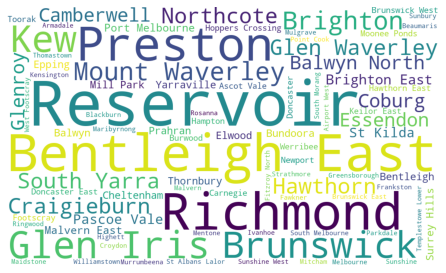

In [9]:
data = fr['Suburb'].value_counts().to_dict()

wordcloud = WordCloud(width = 1000, height = 600, 
            background_color ='white', 
            stopwords = None, 
            min_font_size = 12).generate_from_frequencies(data) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

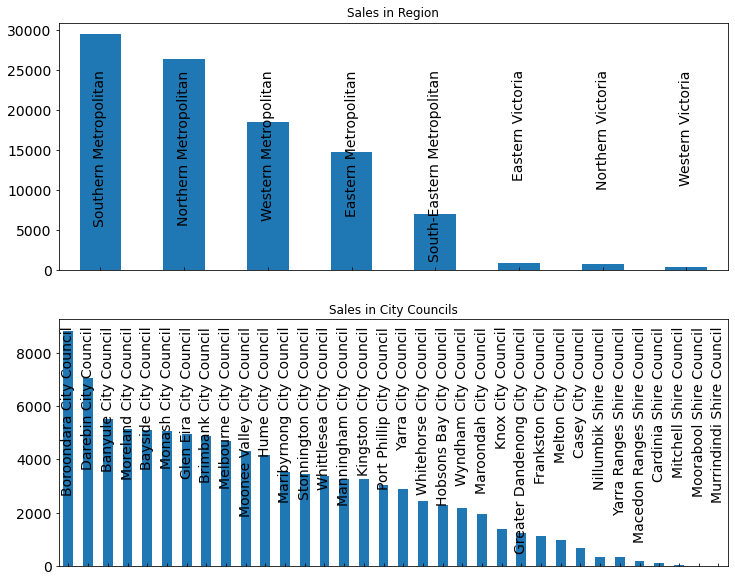

In [10]:
fig, (ax1, ax2) = plt.subplots(2)

fr['Regionname'].value_counts().plot(kind = 'bar',figsize = (8, 4), fontsize = 14, ax = ax1, title = 'Sales in Region')
fr['CouncilArea'].value_counts().plot(kind = 'bar',figsize = (8, 4), fontsize = 14, ax = ax2, title = 'Sales in City Councils')

ax1.tick_params(axis="x",direction="in", pad=-200)
ax2.tick_params(axis="x",direction="in", pad=-240)


fig.set_size_inches(12, 10)
#fig.tight_layout()
plt.show()

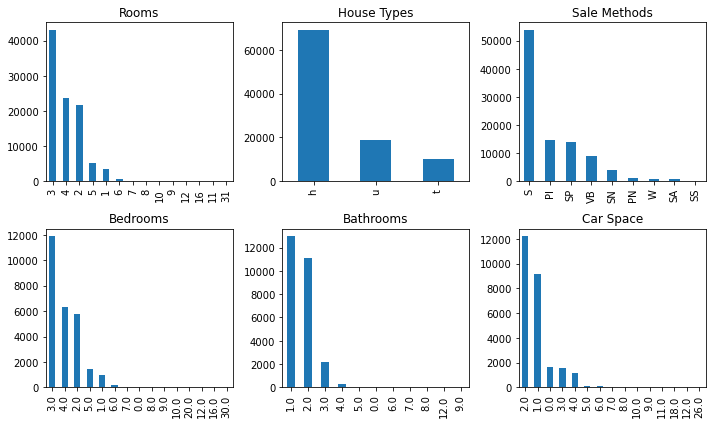

In [11]:
#from matplotlib.pyplot import figure
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)

fr['Rooms'].value_counts().plot(kind = 'bar',figsize = (5, 4), ax = ax1,title = 'Rooms')
fr['Type'].value_counts().plot(kind = 'bar',figsize = (5, 4), ax =ax2, title = 'House Types')
fr['Method'].value_counts().plot(kind = 'bar',figsize = (5, 4), ax =ax3, title = 'Sale Methods')
fr['Bedroom2'].value_counts().plot(kind = 'bar',figsize = (5, 4), ax =ax4, title = 'Bedrooms')
fr['Bathroom'].value_counts().plot(kind = 'bar',figsize = (5, 4), ax =ax5, title = 'Bathrooms')
fr['Car'].value_counts().plot(kind = 'bar',figsize = (5, 4), ax =ax6, title = 'Car Space')

fig.set_size_inches(10, 6)
fig.tight_layout()
plt.show()

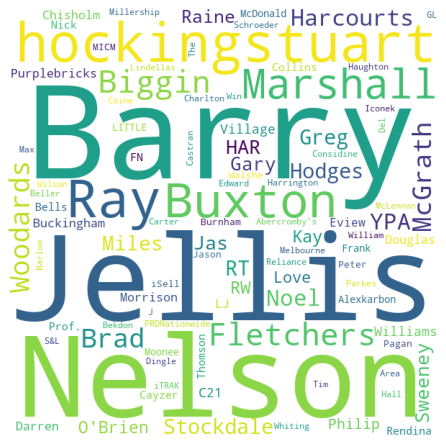

In [12]:
data = fr['SellerG'].value_counts().to_dict()

wordcloud = WordCloud(width = 600, height = 600, 
            background_color ='white', 
            stopwords = None, 
            min_font_size = 10).generate_from_frequencies(data) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

### 3. Data Cleaning

In [13]:
fr.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode         float64
Regionname        object
Propertycount    float64
Distance         float64
CouncilArea       object
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64
Longtitude       float64
dtype: object

In [14]:
fr.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067.0,Northern Metropolitan,...,3.0,Yarra City Council,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
fr_cl = fr
fr_cl = fr_cl.dropna(how='any',axis=0) 
print(fr_cl.count())
print('length:', len(fr_cl))
print('columns:',len(fr_cl.columns))
print(fr_cl.dtypes)
print(fr_cl.nunique())

Suburb           8887
Address          8887
Rooms            8887
Type             8887
Price            8887
Method           8887
SellerG          8887
Date             8887
Postcode         8887
Regionname       8887
Propertycount    8887
Distance         8887
CouncilArea      8887
Bedroom2         8887
Bathroom         8887
Car              8887
Landsize         8887
BuildingArea     8887
YearBuilt        8887
Lattitude        8887
Longtitude       8887
dtype: int64
length: 8887
columns: 21
Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode         float64
Regionname        object
Propertycount    float64
Distance         float64
CouncilArea       object
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
Lattitude        float64


In [16]:
fr_cl['Postcode'] = fr_cl['Postcode'].astype(str)
fr_cl['Suburb'] = fr_cl['Suburb'].astype(str)
fr_cl['Address'] = fr_cl['Address'].astype(str)
fr_cl['Rooms'] = fr_cl['Rooms'].astype(int)
fr_cl['Type'] = fr_cl['Type'].astype(str)
fr_cl['Price'] = fr_cl['Price'].astype(int)
fr_cl['Method'] = fr_cl['Method'].astype(str)
fr_cl['SellerG'] = fr_cl['SellerG'].astype(str)

fr_cl['Postcode'] = fr_cl['Postcode'].astype(float).astype(int).astype(str)

fr_cl['Bedroom2'] = fr_cl['Bedroom2'].astype(int)
fr_cl['Bathroom'] = fr_cl['Bathroom'].astype(int)
fr_cl['Car'] = fr_cl['Car'].astype(int)

fr_cl['Regionname'] = fr_cl['Regionname'].astype(str)
fr_cl['Propertycount'] = fr_cl['Propertycount'].astype(int)
fr_cl['CouncilArea'] = fr_cl['CouncilArea'].astype(str)
fr_cl['YearBuilt'] = fr_cl['YearBuilt'].astype(int)

fr_cl['Date'] = pd.to_datetime(fr_cl['Date'], format = '%d/%m/%Y')

print(fr_cl.dtypes)

Suburb                   object
Address                  object
Rooms                     int32
Type                     object
Price                     int32
Method                   object
SellerG                  object
Date             datetime64[ns]
Postcode                 object
Regionname               object
Propertycount             int32
Distance                float64
CouncilArea              object
Bedroom2                  int32
Bathroom                  int32
Car                       int32
Landsize                float64
BuildingArea            float64
YearBuilt                 int32
Lattitude               float64
Longtitude              float64
dtype: object


<ipython-input-16-6d3d9fb7c089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_cl['Postcode'] = fr_cl['Postcode'].astype(str)
<ipython-input-16-6d3d9fb7c089>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_cl['Suburb'] = fr_cl['Suburb'].astype(str)
<ipython-input-16-6d3d9fb7c089>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [17]:
fr_cl.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,...,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
63025,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,3067,Northern Metropolitan,...,2.5,Yarra City Council,2,1,0,156.0,79.0,1900,-37.8079,144.9934
63027,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,3067,Northern Metropolitan,...,2.5,Yarra City Council,3,2,0,134.0,150.0,1900,-37.8093,144.9944
63029,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,2016-06-04,3067,Northern Metropolitan,...,2.5,Yarra City Council,3,1,2,120.0,142.0,2014,-37.8072,144.9941
63034,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,2016-05-07,3067,Northern Metropolitan,...,2.5,Yarra City Council,4,2,0,245.0,210.0,1910,-37.8024,144.9993
63037,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,2016-10-08,3067,Northern Metropolitan,...,2.5,Yarra City Council,2,1,2,256.0,107.0,1890,-37.8060,144.9954


In [18]:
fr_cl = fr_cl.rename(columns = {'SellerG':'Agent','Regionname':'Region','Propertycount':'PropertyinSuburb','Distance':'DistancetoCBD', 'CouncilArea':'Council', 'Bedroom2':'Bedroom', })

In [19]:
fr_cl.head(1)

,Suburb,Address,Rooms,Type,Price,Method,Agent,Date,Postcode,Region,...,DistancetoCBD,Council,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
63025,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,3067,Northern Metropolitan,...,2.5,Yarra City Council,2,1,0,156.0,79.0,1900,-37.8079,144.9934


### 4. Data manipulation Feature Engineering (One Hot Encoding)

In [20]:
fr_fe = fr_cl

In [21]:
fr_fe['Suburb'] = fr_fe['Suburb'] + ' ' + fr_fe['Postcode']
fr_fe.head(1)

,Suburb,Address,Rooms,Type,Price,Method,Agent,Date,Postcode,Region,...,DistancetoCBD,Council,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
63025,Abbotsford 3067,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,3067,Northern Metropolitan,...,2.5,Yarra City Council,2,1,0,156.0,79.0,1900,-37.8079,144.9934


In [22]:
fr_fe.drop(['Rooms', 'Postcode'], axis = 1, inplace=True)
#fr_fe.drop(['Method'],axis = 1, inplace = True)
fr_fe.head(1)

,Suburb,Address,Type,Price,Method,Agent,Date,Region,PropertyinSuburb,DistancetoCBD,Council,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
63025,Abbotsford 3067,25 Bloomburg St,h,1035000,S,Biggin,2016-02-04,Northern Metropolitan,4019,2.5,Yarra City Council,2,1,0,156.0,79.0,1900,-37.8079,144.9934


In [23]:
print('Feature Count:','\n', fr_fe.count())
print('Cardinality:','\n', fr_fe.nunique())
print('Sumarry Statistics:', '\n', fr_fe.describe())
print('Correlation Matrix:', '\n', fr_fe.corr())

Feature Count: 
 Suburb              8887
Address             8887
Type                8887
Price               8887
Method              8887
Agent               8887
Date                8887
Region              8887
PropertyinSuburb    8887
DistancetoCBD       8887
Council             8887
Bedroom             8887
Bathroom            8887
Car                 8887
Landsize            8887
BuildingArea        8887
YearBuilt           8887
Lattitude           8887
Longtitude          8887
dtype: int64
Cardinality: 
 Suburb               315
Address             8764
Type                   3
Price               1846
Method                 5
Agent                250
Date                  77
Region                 8
PropertyinSuburb     312
DistancetoCBD        201
Council               33
Bedroom               12
Bathroom               9
Car                   11
Landsize            1237
BuildingArea         593
YearBuilt            143
Lattitude           5661
Longtitude          6070
dtype

#### Data description:
The goal of this project is to utilise all the possile information from the dataset source to predict the property price. To pass the datasets to the machine learning process efficiently features need to be further engineered. 
Depending on the prevous observation:\
Address             8764 (unique key)\
Price               1846 (prediction target)

Type                   3 (house, unit and townhouse)

Suburb               315 (location data)
Region                 8\
PropertyinSuburb     312\
DistancetoCBD        201\
Council               33\
Lattitude           5661\
Longtitude          6070


Method                 5 (Popularity/ market factors)\
Agent                250\
Date                  77

Bedroom               12 (Propertie's characters)\
Bathroom               9\
Car                   11\
Landsize            1237\
BuildingArea         593\
YearBuilt            143

In [42]:
df = fr_fe
df.head(1)

,Suburb,Address,Type,Price,Method,Agent,Date,Region,PropertyinSuburb,DistancetoCBD,Council,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
63025,Abbotsford 3067,25 Bloomburg St,h,1035000,S,Biggin,2016-02-04,Northern Metropolitan,4019,2.5,Yarra City Council,2,1,0,156.0,79.0,1900,-37.8079,144.9934


In [43]:
df.corr()

,Price,PropertyinSuburb,DistancetoCBD,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
Price,1.000000,-0.059720,-0.231212,0.460880,0.463501,0.209464,0.058375,0.507284,-0.313664,-0.224255,0.212174
PropertyinSuburb,-0.059720,1.000000,-0.003247,-0.081392,-0.058324,-0.031285,-0.032548,-0.059024,0.017224,0.029793,0.026359
DistancetoCBD,-0.231212,-0.003247,1.000000,0.283460,0.122132,0.259374,0.138559,0.135509,0.313383,-0.055317,0.163941
Bedroom,0.460880,-0.081392,0.283460,1.000000,0.626493,0.405570,0.101035,0.595299,0.016310,0.022745,0.082671
Bathroom,0.463501,-0.058324,0.122132,0.626493,1.000000,0.310962,0.075939,0.553855,0.192914,-0.041859,0.109268
Car,0.209464,-0.031285,0.259374,0.405570,0.310962,1.000000,0.123498,0.317593,0.139255,0.015139,0.035589
Landsize,0.058375,-0.032548,0.138559,0.101035,0.075939,0.123498,1.000000,0.083229,0.037753,0.042484,-0.008196
BuildingArea,0.507284,-0.059024,0.135509,0.595299,0.553855,0.317593,0.083229,1.000000,0.059936,-0.034626,0.097635
YearBuilt,-0.313664,0.017224,0.313383,0.016310,0.192914,0.139255,0.037753,0.059936,1.000000,0.100030,-0.026886
Lattitude,-0.224255,0.029793,-0.055317,0.022745,-0.041859,0.015139,0.042484,-0.034626,0.100030,1.000000,-0.345797


In [44]:
## one hot encoding
#ohe = pd.get_dummies(df.Method)
ohe1 = pd.get_dummies(df.Suburb)
ohe2 = pd.get_dummies(df.Type)
#ohe3 = pd.get_dummies(df.Agent)
#ohe4 = pd.get_dummies(df.Region)
#ohe5 = pd.get_dummies(df.Council)
#ohe6 = pd.get_dummies(df.MonthSold)
#ohe7 = pd.get_dummies(df.YearSold)

df1 = pd.concat([df, ohe1, ohe2], axis = 1)
df1.drop(columns = ['Method', 'Suburb', 'Type', 'Agent', 'Region', 'Council'], inplace = True, axis =1)
df1.head(2)

,Address,Price,Date,PropertyinSuburb,DistancetoCBD,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Abbotsford 3067,Aberfeldie 3040,Airport West 3042,Albanvale 3021,Albert Park 3206,Albion 3020,Alphington 3078,Altona 3018,Altona Meadows 3028,Altona North 3025,Ardeer 3022,Armadale 3143,Ascot Vale 3032,Ashburton 3147,Ashwood 3147,Aspendale 3195,Aspendale Gardens 3195,Attwood 3049,Avondale Heights 3034,Bacchus Marsh 3340,Balaclava 3183,Balwyn 3103,Balwyn North 3104,Bayswater 3153,Bayswater North 3153,Beaconsfield 3807,Beaconsfield Upper 3808,Beaumaris 3193,Bellfield 3081,Bentleigh 3204,Bentleigh East 3165,Berwick 3806,Black Rock 3193,Blackburn 3130,Blackburn North 3130,Blackburn South 3130,Bonbeach 3196,Boronia 3155,Botanic Ridge 3977,Box Hill 3128,Braybrook 3019,Briar Hill 3088,Brighton 3186,Brighton East 3187,Broadmeadows 3047,Brookfield 3338,Brooklyn 3012,Brunswick 3056,Brunswick East 3057,Brunswick West 3055,Bulleen 3105,Bullengarook 3437,Bundoora 3083,Burnley 3121,Burnside 3023,Burnside Heights 3023,Burwood 3125,Burwood East 3151,Cairnlea 3023,Camberwell 3124,Campbellfield 3061,Canterbury 3126,Carlton 3053,Carlton North 3054,Carnegie 3163,Caroline Springs 3023,Carrum 3197,Carrum Downs 3201,Caulfield 3162,Caulfield East 3145,Caulfield North 3161,Caulfield South 3162,Chadstone 3148,Chelsea 3196,Chelsea Heights 3196,Cheltenham 3192,Chirnside Park 3116,Clarinda 3169,Clayton 3168,Clayton South 3169,Clifton Hill 3068,Coburg 3058,Coburg North 3058,Collingwood 3066,Coolaroo 3048,Craigieburn 3064,Cranbourne 3977,Cranbourne North 3977,Cremorne 3121,Croydon 3136,Croydon Hills 3136,Croydon North 3136,Croydon South 3136,Dallas 3047,Dandenong 3175,Dandenong North 3175,Deepdene 3103,Deer Park 3023,Delahey 3037,Derrimut 3030,Diamond Creek 3089,Diggers Rest 3427,Dingley Village 3172,Doncaster 3108,Doncaster East 3109,Donvale 3111,Doreen 3754,Doveton 3177,Eaglemont 3084,East Melbourne 3002,Edithvale 3196,Elsternwick 3185,Eltham 3095,Eltham North 3095,Elwood 3184,Emerald 3782,Endeavour Hills 3802,Epping 3076,Essendon 3040,Essendon North 3041,Essendon West 3040,Fairfield 3078,Fawkner 3060,Ferntree Gully 3156,Fitzroy 3065,Fitzroy North 3068,Flemington 3031,Footscray 3011,Forest Hill 3131,Frankston 3199,Frankston North 3200,Frankston South 3199,Gardenvale 3185,Gisborne 3437,Gisborne South 3437,Gladstone Park 3043,Glen Huntly 3163,Glen Iris 3146,Glen Waverley 3150,Glenroy 3046,Gowanbrae 3043,Greensborough 3088,Greenvale 3059,Hadfield 3046,Hallam 3803,Hampton 3188,Hampton East 3188,Hampton Park 3976,Hawthorn 3122,Hawthorn East 3123,Healesville 3777,Heathmont 3135,Heidelberg 3084,Heidelberg Heights 3081,Heidelberg West 3081,Highett 3190,Hillside 3037,Hoppers Crossing 3029,Hughesdale 3166,Huntingdale 3166,Hurstbridge 3099,Ivanhoe 3079,Ivanhoe East 3079,Jacana 3047,Kealba 3021,Keilor 3036,Keilor Downs 3038,Keilor East 3033,Keilor Lodge 3038,Keilor Park 3042,Kensington 3031,Kew 3101,Kew East 3102,Keysborough 3173,Kilsyth 3137,Kings Park 3021,Kingsbury 3083,Kingsville 3012,Knoxfield 3180,Kooyong 3144,Kurunjang 3337,Lalor 3075,Langwarrin 3910,Lower Plenty 3093,Lysterfield 3156,Maidstone 3012,Malvern 3144,Malvern East 3145,Maribyrnong 3032,McKinnon 3204,Meadow Heights 3048,Melbourne 3000,Melton 3337,Melton South 3338,Melton West 3337,Mentone 3194,Mernda 3754,Mickleham 3064,Middle Park 3206,Mill Park 3082,Mitcham 3132,Mont Albert 3127,Montmorency 3094,Montrose 3765,Moonee Ponds 3039,Moorabbin 3189,Mooroolbark 3138,Mordialloc 3195,Mount Evelyn 3796,Mount Waverley 3149,Mulgrave 3170,Murrumbeena 3163,Narre Warren 3805,Newport 3015,Niddrie 3042,Noble Park 3174,North Melbourne 3051,North Warrandyte 3113,Northcote 3070,Notting Hill 3168,Nunawading 3131,Oak Park 3046,Oakleigh 3166,Oakleigh East 3166,Oakleigh South 3167,Officer 3809,Ormond 3204,Pakenham 3810,Parkdale 3195,Parkville 3052,Pascoe Vale 3044,Patterson Lakes 3197,Plumpton 3335,Point Cook 3030,Port Melbourne 3207,Prahran 3181,Preston 3072,Princes Hill 3054,Research 3095,Reservoir

In [45]:
pd.set_option('display.max_columns', None)
df1.corr()

,Price,PropertyinSuburb,DistancetoCBD,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Abbotsford 3067,Aberfeldie 3040,Airport West 3042,Albanvale 3021,Albert Park 3206,Albion 3020,Alphington 3078,Altona 3018,Altona Meadows 3028,Altona North 3025,Ardeer 3022,Armadale 3143,Ascot Vale 3032,Ashburton 3147,Ashwood 3147,Aspendale 3195,Aspendale Gardens 3195,Attwood 3049,Avondale Heights 3034,Bacchus Marsh 3340,Balaclava 3183,Balwyn 3103,Balwyn North 3104,Bayswater 3153,Bayswater North 3153,Beaconsfield 3807,Beaconsfield Upper 3808,Beaumaris 3193,Bellfield 3081,Bentleigh 3204,Bentleigh East 3165,Berwick 3806,Black Rock 3193,Blackburn 3130,Blackburn North 3130,Blackburn South 3130,Bonbeach 3196,Boronia 3155,Botanic Ridge 3977,Box Hill 3128,Braybrook 3019,Briar Hill 3088,Brighton 3186,Brighton East 3187,Broadmeadows 3047,Brookfield 3338,Brooklyn 3012,Brunswick 3056,Brunswick East 3057,Brunswick West 3055,Bulleen 3105,Bullengarook 3437,Bundoora 3083,Burnley 3121,Burnside 3023,Burnside Heights 3023,Burwood 3125,Burwood East 3151,Cairnlea 3023,Camberwell 3124,Campbellfield 3061,Canterbury 3126,Carlton 3053,Carlton North 3054,Carnegie 3163,Caroline Springs 3023,Carrum 3197,Carrum Downs 3201,Caulfield 3162,Caulfield East 3145,Caulfield North 3161,Caulfield South 3162,Chadstone 3148,Chelsea 3196,Chelsea Heights 3196,Cheltenham 3192,Chirnside Park 3116,Clarinda 3169,Clayton 3168,Clayton South 3169,Clifton Hill 3068,Coburg 3058,Coburg North 3058,Collingwood 3066,Coolaroo 3048,Craigieburn 3064,Cranbourne 3977,Cranbourne North 3977,Cremorne 3121,Croydon 3136,Croydon Hills 3136,Croydon North 3136,Croydon South 3136,Dallas 3047,Dandenong 3175,Dandenong North 3175,Deepdene 3103,Deer Park 3023,Delahey 3037,Derrimut 3030,Diamond Creek 3089,Diggers Rest 3427,Dingley Village 3172,Doncaster 3108,Doncaster East 3109,Donvale 3111,Doreen 3754,Doveton 3177,Eaglemont 3084,East Melbourne 3002,Edithvale 3196,Elsternwick 3185,Eltham 3095,Eltham North 3095,Elwood 3184,Emerald 3782,Endeavour Hills 3802,Epping 3076,Essendon 3040,Essendon North 3041,Essendon West 3040,Fairfield 3078,Fawkner 3060,Ferntree Gully 3156,Fitzroy 3065,Fitzroy North 3068,Flemington 3031,Footscray 3011,Forest Hill 3131,Frankston 3199,Frankston North 3200,Frankston South 3199,Gardenvale 3185,Gisborne 3437,Gisborne South 3437,Gladstone Park 3043,Glen Huntly 3163,Glen Iris 3146,Glen Waverley 3150,Glenroy 3046,Gowanbrae 3043,Greensborough 3088,Greenvale 3059,Hadfield 3046,Hallam 3803,Hampton 3188,Hampton East 3188,Hampton Park 3976,Hawthorn 3122,Hawthorn East 3123,Healesville 3777,Heathmont 3135,Heidelberg 3084,Heidelberg Heights 3081,Heidelberg West 3081,Highett 3190,Hillside 3037,Hoppers Crossing 3029,Hughesdale 3166,Huntingdale 3166,Hurstbridge 3099,Ivanhoe 3079,Ivanhoe East 3079,Jacana 3047,Kealba 3021,Keilor 3036,Keilor Downs 3038,Keilor East 3033,Keilor Lodge 3038,Keilor Park 3042,Kensington 3031,Kew 3101,Kew East 3102,Keysborough 3173,Kilsyth 3137,Kings Park 3021,Kingsbury 3083,Kingsville 3012,Knoxfield 3180,Kooyong 3144,Kurunjang 3337,Lalor 3075,Langwarrin 3910,Lower Plenty 3093,Lysterfield 3156,Maidstone 3012,Malvern 3144,Malvern East 3145,Maribyrnong 3032,McKinnon 3204,Meadow Heights 3048,Melbourne 3000,Melton 3337,Melton South 3338,Melton West 3337,Mentone 3194,Mernda 3754,Mickleham 3064,Middle Park 3206,Mill Park 3082,Mitcham 3132,Mont Albert 3127,Montmorency 3094,Montrose 3765,Moonee Ponds 3039,Moorabbin 3189,Mooroolbark 3138,Mordialloc 3195,Mount Evelyn 3796,Mount Waverley 3149,Mulgrave 3170,Murrumbeena 3163,Narre Warren 3805,Newport 3015,Niddrie 3042,Noble Park 3174,North Melbourne 3051,North Warrandyte 3113,Northcote 3070,Notting Hill 3168,Nunawading 3131,Oak Park 3046,Oakleigh 3166,Oakleigh East 3166,Oakleigh South 3167,Officer 3809,Ormond 3204,Pakenham 3810,Parkdale 3195,Parkville 3052,Pascoe Vale 3044,Patterson Lakes 3197,Plumpton 3335,Point Cook 3030,Port Melbourne 3207,Prahran 3181,Preston 3072,Princes Hill 3054,Research 3095,Reservoir 3073,Richmon

In [46]:
#df1.drop(columns = ['PropertyinSuburb', 'Landsize'], inplace = True, axis =1)
df1.drop_duplicates(subset ="Address", keep = False, inplace = True)

In [47]:
df1.set_index(('Address'), inplace = True)

In [48]:
fr_fe2 = df1

In [49]:
df1.head(2)

,Price,Date,PropertyinSuburb,DistancetoCBD,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Abbotsford 3067,Aberfeldie 3040,Airport West 3042,Albanvale 3021,Albert Park 3206,Albion 3020,Alphington 3078,Altona 3018,Altona Meadows 3028,Altona North 3025,Ardeer 3022,Armadale 3143,Ascot Vale 3032,Ashburton 3147,Ashwood 3147,Aspendale 3195,Aspendale Gardens 3195,Attwood 3049,Avondale Heights 3034,Bacchus Marsh 3340,Balaclava 3183,Balwyn 3103,Balwyn North 3104,Bayswater 3153,Bayswater North 3153,Beaconsfield 3807,Beaconsfield Upper 3808,Beaumaris 3193,Bellfield 3081,Bentleigh 3204,Bentleigh East 3165,Berwick 3806,Black Rock 3193,Blackburn 3130,Blackburn North 3130,Blackburn South 3130,Bonbeach 3196,Boronia 3155,Botanic Ridge 3977,Box Hill 3128,Braybrook 3019,Briar Hill 3088,Brighton 3186,Brighton East 3187,Broadmeadows 3047,Brookfield 3338,Brooklyn 3012,Brunswick 3056,Brunswick East 3057,Brunswick West 3055,Bulleen 3105,Bullengarook 3437,Bundoora 3083,Burnley 3121,Burnside 3023,Burnside Heights 3023,Burwood 3125,Burwood East 3151,Cairnlea 3023,Camberwell 3124,Campbellfield 3061,Canterbury 3126,Carlton 3053,Carlton North 3054,Carnegie 3163,Caroline Springs 3023,Carrum 3197,Carrum Downs 3201,Caulfield 3162,Caulfield East 3145,Caulfield North 3161,Caulfield South 3162,Chadstone 3148,Chelsea 3196,Chelsea Heights 3196,Cheltenham 3192,Chirnside Park 3116,Clarinda 3169,Clayton 3168,Clayton South 3169,Clifton Hill 3068,Coburg 3058,Coburg North 3058,Collingwood 3066,Coolaroo 3048,Craigieburn 3064,Cranbourne 3977,Cranbourne North 3977,Cremorne 3121,Croydon 3136,Croydon Hills 3136,Croydon North 3136,Croydon South 3136,Dallas 3047,Dandenong 3175,Dandenong North 3175,Deepdene 3103,Deer Park 3023,Delahey 3037,Derrimut 3030,Diamond Creek 3089,Diggers Rest 3427,Dingley Village 3172,Doncaster 3108,Doncaster East 3109,Donvale 3111,Doreen 3754,Doveton 3177,Eaglemont 3084,East Melbourne 3002,Edithvale 3196,Elsternwick 3185,Eltham 3095,Eltham North 3095,Elwood 3184,Emerald 3782,Endeavour Hills 3802,Epping 3076,Essendon 3040,Essendon North 3041,Essendon West 3040,Fairfield 3078,Fawkner 3060,Ferntree Gully 3156,Fitzroy 3065,Fitzroy North 3068,Flemington 3031,Footscray 3011,Forest Hill 3131,Frankston 3199,Frankston North 3200,Frankston South 3199,Gardenvale 3185,Gisborne 3437,Gisborne South 3437,Gladstone Park 3043,Glen Huntly 3163,Glen Iris 3146,Glen Waverley 3150,Glenroy 3046,Gowanbrae 3043,Greensborough 3088,Greenvale 3059,Hadfield 3046,Hallam 3803,Hampton 3188,Hampton East 3188,Hampton Park 3976,Hawthorn 3122,Hawthorn East 3123,Healesville 3777,Heathmont 3135,Heidelberg 3084,Heidelberg Heights 3081,Heidelberg West 3081,Highett 3190,Hillside 3037,Hoppers Crossing 3029,Hughesdale 3166,Huntingdale 3166,Hurstbridge 3099,Ivanhoe 3079,Ivanhoe East 3079,Jacana 3047,Kealba 3021,Keilor 3036,Keilor Downs 3038,Keilor East 3033,Keilor Lodge 3038,Keilor Park 3042,Kensington 3031,Kew 3101,Kew East 3102,Keysborough 3173,Kilsyth 3137,Kings Park 3021,Kingsbury 3083,Kingsville 3012,Knoxfield 3180,Kooyong 3144,Kurunjang 3337,Lalor 3075,Langwarrin 3910,Lower Plenty 3093,Lysterfield 3156,Maidstone 3012,Malvern 3144,Malvern East 3145,Maribyrnong 3032,McKinnon 3204,Meadow Heights 3048,Melbourne 3000,Melton 3337,Melton South 3338,Melton West 3337,Mentone 3194,Mernda 3754,Mickleham 3064,Middle Park 3206,Mill Park 3082,Mitcham 3132,Mont Albert 3127,Montmorency 3094,Montrose 3765,Moonee Ponds 3039,Moorabbin 3189,Mooroolbark 3138,Mordialloc 3195,Mount Evelyn 3796,Mount Waverley 3149,Mulgrave 3170,Murrumbeena 3163,Narre Warren 3805,Newport 3015,Niddrie 3042,Noble Park 3174,North Melbourne 3051,North Warrandyte 3113,Northcote 3070,Notting Hill 3168,Nunawading 3131,Oak Park 3046,Oakleigh 3166,Oakleigh East 3166,Oakleigh South 3167,Officer 3809,Ormond 3204,Pakenham 3810,Parkdale 3195,Parkville 3052,Pascoe Vale 3044,Patterson Lakes 3197,Plumpton 3335,Point Cook 3030,Port Melbourne 3207,Prahran 3181,Preston 3072,Princes Hill 3054,Research 3095,Reservoir 3073,Ri

#### 5. Model Definition, Model Training and Model Evaluation

In [50]:
from sklearn import preprocessing

In [66]:
asd = fr_fe2.columns.tolist()
asd.remove('Price')
asd.remove('Date')

In [67]:
target = fr_fe2['Price']
data = fr_fe2[asd]
data.head(2)

,PropertyinSuburb,DistancetoCBD,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Abbotsford 3067,Aberfeldie 3040,Airport West 3042,Albanvale 3021,Albert Park 3206,Albion 3020,Alphington 3078,Altona 3018,Altona Meadows 3028,Altona North 3025,Ardeer 3022,Armadale 3143,Ascot Vale 3032,Ashburton 3147,Ashwood 3147,Aspendale 3195,Aspendale Gardens 3195,Attwood 3049,Avondale Heights 3034,Bacchus Marsh 3340,Balaclava 3183,Balwyn 3103,Balwyn North 3104,Bayswater 3153,Bayswater North 3153,Beaconsfield 3807,Beaconsfield Upper 3808,Beaumaris 3193,Bellfield 3081,Bentleigh 3204,Bentleigh East 3165,Berwick 3806,Black Rock 3193,Blackburn 3130,Blackburn North 3130,Blackburn South 3130,Bonbeach 3196,Boronia 3155,Botanic Ridge 3977,Box Hill 3128,Braybrook 3019,Briar Hill 3088,Brighton 3186,Brighton East 3187,Broadmeadows 3047,Brookfield 3338,Brooklyn 3012,Brunswick 3056,Brunswick East 3057,Brunswick West 3055,Bulleen 3105,Bullengarook 3437,Bundoora 3083,Burnley 3121,Burnside 3023,Burnside Heights 3023,Burwood 3125,Burwood East 3151,Cairnlea 3023,Camberwell 3124,Campbellfield 3061,Canterbury 3126,Carlton 3053,Carlton North 3054,Carnegie 3163,Caroline Springs 3023,Carrum 3197,Carrum Downs 3201,Caulfield 3162,Caulfield East 3145,Caulfield North 3161,Caulfield South 3162,Chadstone 3148,Chelsea 3196,Chelsea Heights 3196,Cheltenham 3192,Chirnside Park 3116,Clarinda 3169,Clayton 3168,Clayton South 3169,Clifton Hill 3068,Coburg 3058,Coburg North 3058,Collingwood 3066,Coolaroo 3048,Craigieburn 3064,Cranbourne 3977,Cranbourne North 3977,Cremorne 3121,Croydon 3136,Croydon Hills 3136,Croydon North 3136,Croydon South 3136,Dallas 3047,Dandenong 3175,Dandenong North 3175,Deepdene 3103,Deer Park 3023,Delahey 3037,Derrimut 3030,Diamond Creek 3089,Diggers Rest 3427,Dingley Village 3172,Doncaster 3108,Doncaster East 3109,Donvale 3111,Doreen 3754,Doveton 3177,Eaglemont 3084,East Melbourne 3002,Edithvale 3196,Elsternwick 3185,Eltham 3095,Eltham North 3095,Elwood 3184,Emerald 3782,Endeavour Hills 3802,Epping 3076,Essendon 3040,Essendon North 3041,Essendon West 3040,Fairfield 3078,Fawkner 3060,Ferntree Gully 3156,Fitzroy 3065,Fitzroy North 3068,Flemington 3031,Footscray 3011,Forest Hill 3131,Frankston 3199,Frankston North 3200,Frankston South 3199,Gardenvale 3185,Gisborne 3437,Gisborne South 3437,Gladstone Park 3043,Glen Huntly 3163,Glen Iris 3146,Glen Waverley 3150,Glenroy 3046,Gowanbrae 3043,Greensborough 3088,Greenvale 3059,Hadfield 3046,Hallam 3803,Hampton 3188,Hampton East 3188,Hampton Park 3976,Hawthorn 3122,Hawthorn East 3123,Healesville 3777,Heathmont 3135,Heidelberg 3084,Heidelberg Heights 3081,Heidelberg West 3081,Highett 3190,Hillside 3037,Hoppers Crossing 3029,Hughesdale 3166,Huntingdale 3166,Hurstbridge 3099,Ivanhoe 3079,Ivanhoe East 3079,Jacana 3047,Kealba 3021,Keilor 3036,Keilor Downs 3038,Keilor East 3033,Keilor Lodge 3038,Keilor Park 3042,Kensington 3031,Kew 3101,Kew East 3102,Keysborough 3173,Kilsyth 3137,Kings Park 3021,Kingsbury 3083,Kingsville 3012,Knoxfield 3180,Kooyong 3144,Kurunjang 3337,Lalor 3075,Langwarrin 3910,Lower Plenty 3093,Lysterfield 3156,Maidstone 3012,Malvern 3144,Malvern East 3145,Maribyrnong 3032,McKinnon 3204,Meadow Heights 3048,Melbourne 3000,Melton 3337,Melton South 3338,Melton West 3337,Mentone 3194,Mernda 3754,Mickleham 3064,Middle Park 3206,Mill Park 3082,Mitcham 3132,Mont Albert 3127,Montmorency 3094,Montrose 3765,Moonee Ponds 3039,Moorabbin 3189,Mooroolbark 3138,Mordialloc 3195,Mount Evelyn 3796,Mount Waverley 3149,Mulgrave 3170,Murrumbeena 3163,Narre Warren 3805,Newport 3015,Niddrie 3042,Noble Park 3174,North Melbourne 3051,North Warrandyte 3113,Northcote 3070,Notting Hill 3168,Nunawading 3131,Oak Park 3046,Oakleigh 3166,Oakleigh East 3166,Oakleigh South 3167,Officer 3809,Ormond 3204,Pakenham 3810,Parkdale 3195,Parkville 3052,Pascoe Vale 3044,Patterson Lakes 3197,Plumpton 3335,Point Cook 3030,Port Melbourne 3207,Prahran 3181,Preston 3072,Princes Hill 3054,Research 3095,Reservoir 3073,Richmond 3121

In [68]:
target.head(2)

Address
25 Bloomburg St    1035000
55a Park St        1600000
Name: Price, dtype: int32

In [69]:
from sklearn.preprocessing import StandardScaler
X = data
y = target

#scale the data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # view the scaled data
# X

###### Linear Regressing model

In [71]:
# linear regression model
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

train = X

# here the model is being trained for use in a Multivariate linear regression model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

linreg.fit(x_train, y_train)

r2= linreg.score(x_test, y_test)

y_pred = linreg.predict(x_test)
y_train_pred = linreg.predict(x_train)

#perform metrics to evaluate performance
print("MSE: ", (metrics.mean_squared_error(y_test,y_pred)))
print("Scaled MSE: ", (metrics.mean_squared_error(y_test, y_pred)/10**25))

(6916, 328) (1730, 328) (6916,) (1730,)
MSE:  2.5809085391309734e+25
Scaled MSE:  2.580908539130973


In [74]:
# Here, a test sample is inpted and we can get an accuracy score for this specific instance
X_uc = x_test.iloc[[51],:]
y_predict = linreg.predict(X_uc)
y_actual = y_test.iloc[[51]]

print(X_uc)

               PropertyinSuburb  DistancetoCBD  Bedroom  Bathroom  Car  \
Address                                                                  
30 Johnson St             11364            5.3        4         1    2   

               Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
Address                                                                   
30 Johnson St     318.0         161.0       1920   -37.7631   144.99884   

               Abbotsford 3067  Aberfeldie 3040  Airport West 3042  \
Address                                                              
30 Johnson St                0                0                  0   

               Albanvale 3021  Albert Park 3206  Albion 3020  Alphington 3078  \
Address                                                                         
30 Johnson St               0                 0            0                0   

               Altona 3018  Altona Meadows 3028  Altona North 3025  \
Address                   

In [75]:
print('Actual value:' , y_actual, '\n')
print('Predicted value:' , y_predict,'\n')
print('Accuracy for this test:', y_predict / y_actual)

Actual value: Address
30 Johnson St    1515000
Name: Price, dtype: int32 

Predicted value: [1561237.265625] 

Accuracy for this test: Address
30 Johnson St    1.03052
Name: Price, dtype: float64


##### Sequential model with keras imports

In [88]:
# tensorflow and keras been installed in anaconda3 under tensorflow environment

In [76]:
import tensorflow as tf
print(tf. __version__) 

2.5.1


In [81]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = data
Y = target

X_train, x_test, y_train, y_test =train_test_split (X, y, test_size = 0.2)

model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = 328))
model.add(Dense(1,))
model.compile(optimizer = 'adam', loss='mean_squared_error', metrics = ['mse'])

model.fit(X_train, y_train, batch_size = 20, epochs = 200)

y_pred = model.predict(x_test)

print('MSE: ', (metrics.mean_squared_error(y_test, y_pred)))
print('Scaled MSE:', (metrics.mean_squared_error(y_test, y_pred)/10**11))


Epoch 1/200
346/346 [==============================] - 1s 482us/step - loss: 1743377587917.0952 - mse: 1743377578473.8674
Epoch 2/200
346/346 [==============================] - 0s 478us/step - loss: 1528820803542.6858 - mse: 1528820803542.6858
Epoch 3/200
346/346 [==============================] - 0s 475us/step - loss: 1283399164210.9048 - mse: 1283399164966.3630
Epoch 4/200
346/346 [==============================] - 0s 481us/step - loss: 1049762573002.1440 - mse: 1049762573002.1440
Epoch 5/200
346/346 [==============================] - 0s 475us/step - loss: 814941622944.8300 - mse: 814941622567.1008
Epoch 6/200
346/346 [==============================] - 0s 476us/step - loss: 740259941750.7781 - mse: 740259941750.7781
Epoch 7/200
346/346 [==============================] - 0s 481us/step - loss: 701751223948.1729 - mse: 701751218093.3717
Epoch 8/200
346/346 [==============================] - 0s 470us/step - loss: 652661757662.8011 - mse: 652661757662.8011
Epoch 9/200
346/346 [===========

346/346 [==============================] - 0s 493us/step - loss: 393267005894.4553 - mse: 393267045367.1470
Epoch 69/200
346/346 [==============================] - 0s 502us/step - loss: 365139225242.9280 - mse: 365139225242.9280
Epoch 70/200
346/346 [==============================] - 0s 487us/step - loss: 401936986572.3574 - mse: 401936986572.3574
Epoch 71/200
346/346 [==============================] - 0s 493us/step - loss: 367950154276.8876 - mse: 367950154276.8876
Epoch 72/200
346/346 [==============================] - 0s 484us/step - loss: 370660787167.5389 - mse: 370660787167.5389
Epoch 73/200
346/346 [==============================] - 0s 490us/step - loss: 356622405218.8588 - mse: 356622387560.0231
Epoch 74/200
346/346 [==============================] - 0s 481us/step - loss: 352492650118.2709 - mse: 352492650118.2709
Epoch 75/200
346/346 [==============================] - 0s 481us/step - loss: 406900676790.9625 - mse: 406900679435.0663
Epoch 76/200
346/346 [=======================

346/346 [==============================] - 0s 473us/step - loss: 319350267974.8242 - mse: 319350267974.8242
Epoch 136/200
346/346 [==============================] - 0s 470us/step - loss: 324482398414.5706 - mse: 324482398414.5706
Epoch 137/200
346/346 [==============================] - 0s 473us/step - loss: 357568517099.3430 - mse: 357568517099.3430
Epoch 138/200
346/346 [==============================] - 0s 467us/step - loss: 333795828727.1470 - mse: 333795828727.1470
Epoch 139/200
346/346 [==============================] - 0s 467us/step - loss: 328403957022.2479 - mse: 328403957022.2479
Epoch 140/200
346/346 [==============================] - 0s 473us/step - loss: 334052297677.8328 - mse: 334052297677.8328
Epoch 141/200
346/346 [==============================] - 0s 475us/step - loss: 329820635844.2421 - mse: 329820635844.2421
Epoch 142/200
346/346 [==============================] - 0s 470us/step - loss: 340686552993.5677 - mse: 340686552993.5677
Epoch 143/200
346/346 [===============

In [90]:
X_uc = x_test.iloc[[1119],:]
y_predict = model.predict(X_uc)
y_actual = y_test.iloc[[1119]]

print(X_uc)


                    PropertyinSuburb  DistancetoCBD  Bedroom  Bathroom  Car  \
Address                                                                       
3/388 Dandenong Rd              6923            8.1        2         1    1   

                    Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  \
Address                                                                        
3/388 Dandenong Rd       0.0          67.0       2011   -37.8609    145.0126   

                    Abbotsford 3067  Aberfeldie 3040  Airport West 3042  \
Address                                                                   
3/388 Dandenong Rd                0                0                  0   

                    Albanvale 3021  Albert Park 3206  Albion 3020  \
Address                                                             
3/388 Dandenong Rd               0                 0            0   

                    Alphington 3078  Altona 3018  Altona Meadows 3028  \
Address       

In [91]:
print('Adress:' , y_actual, '\n')
print('Actual value:' , y_actual[0], '\n')
print('Predicted value:' , y_predict[0][0],'\n')
print('Accuracy for this test:', y_predict[0][0] / y_actual)

Adress: Address
3/388 Dandenong Rd    550000
Name: Price, dtype: int32 

Actual value: 550000 

Predicted value: 642239.3 

Accuracy for this test: Address
3/388 Dandenong Rd    1.167708
Name: Price, dtype: float64


Epoch 1/200
346/346 [==============================] - 1s 2ms/step - loss: 310440820736.0000 - mse: 310440820736.0000 - val_loss: 294412156928.0000 - val_mse: 294412156928.0000
Epoch 2/200
346/346 [==============================] - 0s 594us/step - loss: 310109798400.0000 - mse: 310109798400.0000 - val_loss: 294246809600.0000 - val_mse: 294246809600.0000
Epoch 3/200
346/346 [==============================] - 0s 594us/step - loss: 309910503424.0000 - mse: 309910503424.0000 - val_loss: 293404180480.0000 - val_mse: 293404180480.0000
Epoch 4/200
346/346 [==============================] - 0s 594us/step - loss: 309514764288.0000 - mse: 309514764288.0000 - val_loss: 293116018688.0000 - val_mse: 293116051456.0000
Epoch 5/200
346/346 [==============================] - 0s 594us/step - loss: 309301149696.0000 - mse: 309301149696.0000 - val_loss: 293197905920.0000 - val_mse: 293197905920.0000
Epoch 6/200
346/346 [==============================] - 0s 586us/step - loss: 309058895872.0000 - mse: 30905

346/346 [==============================] - 0s 583us/step - loss: 298362142720.0000 - mse: 298362142720.0000 - val_loss: 281289195520.0000 - val_mse: 281289195520.0000
Epoch 47/200
346/346 [==============================] - 0s 597us/step - loss: 298151706624.0000 - mse: 298151706624.0000 - val_loss: 281111199744.0000 - val_mse: 281111199744.0000
Epoch 48/200
346/346 [==============================] - 0s 597us/step - loss: 297927442432.0000 - mse: 297927442432.0000 - val_loss: 280804524032.0000 - val_mse: 280804524032.0000
Epoch 49/200
346/346 [==============================] - 0s 603us/step - loss: 297719169024.0000 - mse: 297719169024.0000 - val_loss: 280511315968.0000 - val_mse: 280511315968.0000
Epoch 50/200
346/346 [==============================] - 0s 601us/step - loss: 297460596736.0000 - mse: 297460596736.0000 - val_loss: 280145166336.0000 - val_mse: 280145166336.0000
Epoch 51/200
346/346 [==============================] - 0s 598us/step - loss: 297100541952.0000 - mse: 2971005419

346/346 [==============================] - 0s 629us/step - loss: 287912460288.0000 - mse: 287912460288.0000 - val_loss: 270408187904.0000 - val_mse: 270408187904.0000
Epoch 92/200
346/346 [==============================] - 0s 629us/step - loss: 287629443072.0000 - mse: 287629443072.0000 - val_loss: 270075084800.0000 - val_mse: 270075084800.0000
Epoch 93/200
346/346 [==============================] - 0s 629us/step - loss: 287403114496.0000 - mse: 287403114496.0000 - val_loss: 269963984896.0000 - val_mse: 269963984896.0000
Epoch 94/200
346/346 [==============================] - 0s 624us/step - loss: 287096045568.0000 - mse: 287096045568.0000 - val_loss: 269702676480.0000 - val_mse: 269702676480.0000
Epoch 95/200
346/346 [==============================] - 0s 627us/step - loss: 286997544960.0000 - mse: 286997544960.0000 - val_loss: 269394411520.0000 - val_mse: 269394411520.0000
Epoch 96/200
346/346 [==============================] - 0s 623us/step - loss: 286798938112.0000 - mse: 2867989381

346/346 [==============================] - 0s 612us/step - loss: 280026316800.0000 - mse: 280026316800.0000 - val_loss: 262948061184.0000 - val_mse: 262948061184.0000
Epoch 137/200
346/346 [==============================] - 0s 609us/step - loss: 279944626176.0000 - mse: 279944626176.0000 - val_loss: 263216136192.0000 - val_mse: 263216136192.0000
Epoch 138/200
346/346 [==============================] - 0s 615us/step - loss: 279826137088.0000 - mse: 279826137088.0000 - val_loss: 262485278720.0000 - val_mse: 262485278720.0000
Epoch 139/200
346/346 [==============================] - 0s 609us/step - loss: 279645421568.0000 - mse: 279645421568.0000 - val_loss: 262127239168.0000 - val_mse: 262127239168.0000
Epoch 140/200
346/346 [==============================] - 0s 620us/step - loss: 279475322880.0000 - mse: 279475322880.0000 - val_loss: 262651953152.0000 - val_mse: 262651953152.0000
Epoch 141/200
346/346 [==============================] - 0s 606us/step - loss: 279400579072.0000 - mse: 27940

346/346 [==============================] - 0s 603us/step - loss: 273713954816.0000 - mse: 273713954816.0000 - val_loss: 256594116608.0000 - val_mse: 256594116608.0000
Epoch 182/200
346/346 [==============================] - 0s 600us/step - loss: 273631903744.0000 - mse: 273631903744.0000 - val_loss: 256673693696.0000 - val_mse: 256673693696.0000
Epoch 183/200
346/346 [==============================] - 0s 603us/step - loss: 273486987264.0000 - mse: 273486987264.0000 - val_loss: 256112017408.0000 - val_mse: 256112017408.0000
Epoch 184/200
346/346 [==============================] - 0s 600us/step - loss: 273319870464.0000 - mse: 273319870464.0000 - val_loss: 256363495424.0000 - val_mse: 256363495424.0000
Epoch 185/200
346/346 [==============================] - 0s 606us/step - loss: 273209081856.0000 - mse: 273209049088.0000 - val_loss: 256157892608.0000 - val_mse: 256157892608.0000
Epoch 186/200
346/346 [==============================] - 0s 600us/step - loss: 273006608384.0000 - mse: 27300

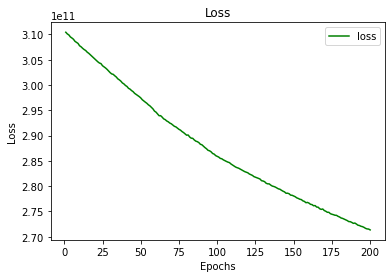

In [92]:
# Visulize performance for sequence model in terms of loss
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data = (x_test, y_test))

loss = history.history['loss']
epochs = range(1, 201)
plt.plot(epochs, loss, 'g', label = 'loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()